In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd
from PIL import Image
from torchvision import transforms
import torch
import torchvision.models as models
import torch.optim as optim
from torchvision import datasets

In [39]:
# Load the Pre-Trained ResNet Model
resnet_cnn = models.resnet18(pretrained=True)
resnet_cnn.eval()

c:\Users\seanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\seanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
def make_img_same_dimension(dimx, dimy):
    acipenseridae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Acipenseriformes/Acipenseridae (Sturgeons)/")
    polyodontidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Acipenseriformes/Polyodontidae (Paddlefishes)/")
    albulidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Albuliformes/Albulidae (Bonefish)/")
    amiidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Amiiformes/Amiidae (Bowfins)/")
    ateleopodidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Ateleopodiformes/Ateleopodidae (Jellynose Fishes)/")
    atherinopsidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Atheriniformes/Atherinopsidae (Silversides)/")
    alepisauridae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Aulopiformes/Alepisauridae (Lancetfish)/")
    aulopidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Aulopiformes/Aulopidae (Flagfish)/")
    synodontidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Aulopiformes/Synodontidae (Lizardfish)/")
    batrachoididae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Batrachoidiformes/Batrachoididae (Toadfish)/")
    belonidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Beloniformes/Belonidae (Needlefish)/")
    exocoetidae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Beloniformes/Exocoetidae (Flyingfish)/")
    anoplogastridae_imgs = os.fsencode("../Fish Photos/Actinopterygii/Bercyiformes/Anoplogastridae (Fangtooth)/")
    ceratodontidae_imgs = os.fsencode("../Fish Photos/Chondrichthyes/Ceratodontiformes/Ceratodontidae (Australian Lungfish)/")
    chimaeridae_imgs = os.fsencode("../Fish Photos/Chondrichthyes/Chimaeriformes/Chimaeridae (Shortnose chimaeras)")
    heterodontidae_imgs = os.fsencode("../Fish Photos/Chondrichthyes/Heterodontiformes/Heterodontidae (Bullhead and Horn Sharks)")

    train_fields = []
    test_fields = []
    for file in os.listdir(acipenseridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Acipenseriformes/Acipenseridae (Sturgeons)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [1]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    train_fields_1 = train_fields[:40]
    test_fields_1 = train_fields[41:]
    train_fields += train_fields_1
    test_fields += test_fields_1
    
    for file in os.listdir(polyodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Acipenseriformes/Polyodontidae (Paddlefishes)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [2]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]


    for file in os.listdir(albulidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Albuliformes/Albulidae (Bonefish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [3]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(amiidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Amiiformes/Amiidae (Bowfins)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [4]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]

    for file in os.listdir(ateleopodidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Ateleopodiformes/Ateleopodidae (Jellynose Fishes)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [5]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(atherinopsidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Atheriniformes/Atherinopsidae (Silversides)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [6]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
        
    for file in os.listdir(alepisauridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Aulopiformes/Alepisauridae (Lancetfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [7]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(aulopidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Aulopiformes/Aulopidae (Flagfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [8]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(synodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Aulopiformes/Synodontidae (Lizardfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [9]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(batrachoididae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Batrachoidiformes/Batrachoididae (Toadfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [10]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(belonidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Beloniformes/Belonidae (Needlefish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [11]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(exocoetidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Beloniformes/Exocoetidae (Flyingfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [12]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(anoplogastridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Actinopterygii/Bercyiformes/Anoplogastridae (Fangtooth)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [13]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]
    
    for file in os.listdir(ceratodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Chondrichthyes/Ceratodontiformes/Ceratodontidae (Australian Lungfish)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [14]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]

    for file in os.listdir(chimaeridae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Chondrichthyes/Chimaeriformes/Chimaeridae (Shortnose chimaeras)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [15]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]

    for file in os.listdir(heterodontidae_imgs):
        filename = os.fsdecode(file)
        image = cv2.imread("../Fish Photos/Chondrichthyes/Heterodontiformes/Heterodontidae (Bullhead and Horn Sharks)/" + filename)
        b, g, r = cv2.split(image)
        rgb_img = cv2.merge([r,g,b])
        resized_img = cv2.resize(rgb_img, (dimx, dimy))
        img_as_csv = [16]
        for i in range(len(resized_img)):
            for j in range(len(resized_img[0])):
                 for l in range(0,3):
                    img_as_csv.append(resized_img[i][j][l])
        train_fields.append(img_as_csv)
    test_fields += train_fields[-10:]
    del train_fields[-10:]

    with open('train_data.csv', 'a',newline='') as imageFile:
            csv_writer = csv.writer(imageFile)
            for i in range(len(train_fields)):
                csv_writer.writerow(train_fields[i])
    
    with open('test_data.csv', 'a',newline='') as imageFile:
            csv_writer = csv.writer(imageFile)
            for i in range(len(test_fields)):
                csv_writer.writerow(test_fields[i])
    return
make_img_same_dimension(150,150)

In [41]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [42]:
class ReadDataCSV(Dataset):
    def __init__(self, csv_file_path, train=True, transform=None):
        data = pd.read_csv(csv_file_path)

        raw = data.to_numpy
        num_images = data.shape[0]
        image_as_array = data.values[:,1:]
        label_as_array = data.values[:,0]
        self.images_numpy = image_as_array.reshape(num_images, 150, 150, 3)
        self.targets = label_as_array
        self.transform = transform
    
    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        img, target = self.images_numpy[index], self.targets[index]
        img = img.squeeze().astype(np.uint8)
        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)
        target = torch.tensor(target)
        return img, target

In [43]:
dataset = ReadDataCSV("test_data.csv",transform=img_transform)
batch_size = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


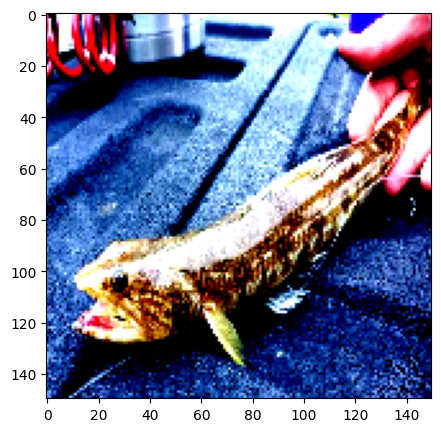

In [44]:
[imgs,labels] = (next(iter(dataloader)))
imgs = np.squeeze(imgs)
plt.figure(figsize=(5,5))
plt.imshow(imgs[0].permute(1,2,0).cpu().numpy())

In [45]:
# # Load the Pre-Trained ResNet Model
# resnet_cnn = models.resnet18()
# for param in resnet_cnn.parameters():
#     param.requires_grad = False
# resnet_cnn.fc = torch.nn.Linear(resnet_cnn.fc.in_features, 290)
# for param in resnet_cnn.fc.parameters():
#     param.requires_grad = True
# resnet_cnn.eval()

# # Move the model to the GPU if possible
# if torch.cuda.is_available():
#     resnet_cnn.to('cuda')

# for inputs, labels in dataloader:
#     if torch.cuda.is_available():
#         inputs = inputs.to('cuda')
    
#     with torch.no_grad():
#         outputs = resnet_cnn(inputs)
#     probabilities = torch.nn.functional.softmax(outputs, dim=1)

#     _, predicted_indices = torch.max(probabilities, 1)

#     # for i in range(len(labels)):
#     #     print(f'Predicted class: {dataset.targets[predicted_indices[i]]}, Ground truth: {dataset.targets[labels[i]]}')
#     correct = 0
#     for i, label in enumerate(labels):
#         # print("Predicted class: " + str(dataset.targets[predicted_indices[i]]) + ", Ground Truth Class: " + label)
#         if dataset.targets[predicted_indices[i]] == label:
#             correct += 1
#     print("correct: " + str(correct) + ", wrong: " + str(len(labels)-correct))
#     # # Debug the probabilities tensor
#     # print("Probabilities shape:", dataset.targets.shape)
#     # print("Probabilities values:", dataset.images_numpy.shape)

#     # # Debug the predicted indices
#     # print("Predicted indices max value:", torch.max(predicted_indices))

In [46]:
train_dataset = ReadDataCSV("train_data.csv",transform=img_transform)
test_dataset = ReadDataCSV("test_data.csv",transform=img_transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

In [47]:
torch.cuda.empty_cache()
model = models.resnet18(weights=models.ResNet18_Weights)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 290)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.009, momentum=0.9)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(100):
    model.train()

    running_loss = 0.0
    for inputs, labels in train_dataloader:
        inputs,labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    print(f"Epoch [{epoch+1}/{10}], Loss: {running_loss / len(train_dataloader.dataset)}")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if epoch == 24:
                print("predicted: " + str(predicted) + " labels: " + str(labels))
    print("correct: " + str(correct))
    accuracy = 100 * correct / total
    print(f"Accuracy on test set after epoch {epoch+1}: {accuracy:.2f}%")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
CUDA=torch.cuda.is_available()

model = models.resnet18(weights=models.ResNet18_Weights)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 16)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
accuracy_values=[]
epoch_number=[]
if CUDA:
    model.cuda()
for epoch in range(25):  # loop over the dataset multiple times. Here 10 means 10 epochs
    running_loss = 0.0
    for i, (inputs,labels) in enumerate(train_dataloader, 0):
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs = inputs.cpu()
            labels = labels.cpu()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[epoch%d, itr%5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_dataloader:
            if CUDA:
                images = images.cuda()
                labels = labels.cuda()
            else:
                images = images.cpu()
                labels =labels.cpu()

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            if CUDA:
              correct += (predicted.cpu()==labels.cpu()).sum().item()
            else:
              correct += (predicted==labels).sum().item()
            print("predicted: " + str(predicted) + " labels: " + str(labels))

        TestAccuracy = 100 * correct / total;
        epoch_number += [epoch+1]
        accuracy_values += [TestAccuracy]
        print('Epoch=%d Test Accuracy=%.3f' %
                  (epoch + 1, TestAccuracy))

print('Finished Training')

RuntimeError: cuDNN error: CUDNN_STATUS_MAPPING_ERROR

In [ ]:
# #VGG Model
# CUDA=torch.cuda.is_available()

# model = models.vgg19(weights=models.VGG19_Weights)
# num_ftrs = model.classifier[-1].in_features
# model.fc = torch.nn.Linear(num_ftrs, 290)

# criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# accuracy_values=[]
# epoch_number=[]

# if CUDA:
#     model.cuda()

# for epoch in range(25):  # loop over the dataset multiple times. Here 10 means 10 epochs
#     running_loss = 0.0
#     for i, (inputs,labels) in enumerate(train_dataloader, 0):
#         if CUDA:
#             inputs = inputs.cuda()
#             labels = labels.cuda()
#         else:
#             inputs = inputs.cpu()
#             labels = labels.cpu()

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[epoch%d, itr%5d] loss: %.3f' %
#                 (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0

#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in test_dataloader:
#             if CUDA:
#                 images = images.cuda()
#                 labels = labels.cuda()
#             else:
#                 images = images.cpu()
#                 labels =labels.cpu()

#             outputs = model(images)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted==labels).sum().item()

#         TestAccuracy = 100 * correct / total;
#         epoch_number += [epoch+1]
#         accuracy_values += [TestAccuracy]
#         print('Epoch=%d Test Accuracy=%.3f' %
#                   (epoch + 1, TestAccuracy))

# print('Finished Training')

c:\Users\seanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch=1 Test Accuracy=0.000
Epoch=2 Test Accuracy=0.000
Epoch=3 Test Accuracy=0.000
Epoch=4 Test Accuracy=0.000
Epoch=5 Test Accuracy=0.000
Epoch=6 Test Accuracy=0.000
Epoch=7 Test Accuracy=0.000
Epoch=8 Test Accuracy=0.000
Epoch=9 Test Accuracy=0.000
Epoch=10 Test Accuracy=0.000
Epoch=11 Test Accuracy=0.000
Epoch=12 Test Accuracy=0.000
Epoch=13 Test Accuracy=0.000
Epoch=14 Test Accuracy=0.000
Epoch=15 Test Accuracy=0.000
Epoch=16 Test Accuracy=0.000
Epoch=17 Test Accuracy=0.000
Epoch=18 Test Accuracy=0.000
Epoch=19 Test Accuracy=0.000
Epoch=20 Test Accuracy=0.000
Epoch=21 Test Accuracy=0.000
Epoch=22 Test Accuracy=0.000
Epoch=23 Test Accuracy=0.000
Epoch=24 Test Accuracy=0.000
Epoch=25 Test Accuracy=0.000
Finished Training
